In [1]:
import mne
import matplotlib.pyplot as plt
from nilearn.masking import apply_mask, compute_epi_mask
import numpy as np

path_eeg = '/home/david/eeg_informed_fmri/datasets/'

dataset = '01/fMRI/'

individual = '35/'

fmri_file = '3_nw_mepi_rest_with_cross.nii.gz'

complete_path = path_eeg + dataset + individual + fmri_file

/home/david/anaconda3/envs/fmri_eeg/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


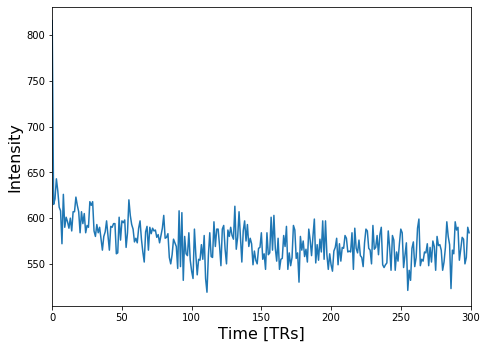

In [2]:
mask_img = compute_epi_mask(complete_path)

masked_data = apply_mask(complete_path, mask_img)

# masked_data shape is (timepoints, voxels). We can plot the first 150
# timepoints from two voxels



# And now plot a few of these
plt.figure(figsize=(7, 5))
plt.plot(masked_data[:, 5:6])
plt.xlabel('Time [TRs]', fontsize=16)
plt.ylabel('Intensity', fontsize=16)
plt.xlim(0, masked_data.shape[0])
plt.subplots_adjust(bottom=.12, top=.95, right=.95, left=.12)

plt.show()

In [3]:
import nilearn.image as image

fmri_original = image.load_img(complete_path)

fmri_img = image.smooth_img(fmri_original, fwhm=6)

# First, compute the voxel-wise mean of smooth EPI image (first argument) using
# image processing module `image`
mean_img = image.mean_img(fmri_img)

In [14]:
from nilearn.decomposition import CanICA

canica = CanICA(n_components=20, smoothing_fwhm=6.,
                memory="nilearn_cache", memory_level=2,
                threshold=3., verbose=10, random_state=0)
canica.fit(fmri_img)

# Retrieve the independent components in brain space. Directly
# accesible through attribute `components_img_`. Note that this
# attribute is implemented from version 0.4.1. For older versions,
# see note section above for details.
components_img = canica.components_img_

[MultiNiftiMasker.fit] Loading data from [Nifti1Image(
shape=(64, 64, 30, 300),
affine=array([[-3.28125,  0.     ,  0.     ,  0.     ],
       [ 0.     ,  3.28125,  0.     , -0.     ],
       [ 0.     ,  0.     ,  3.     , -0.     ],
       
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
randomized_svd(array([[ 0.005031, ..., -0.002526],
       ...,
       [ 0.006209, ...,  0.016552]], dtype=float32), n_components=20, transpose=True, random_state=0, n_iter=3)
___________________________________________________randomized_svd - 0.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.006783, ...,  0.00758 ],
       ...,
       [-0.001543, ...,  0.005443]]), whiten=True, fun='cube', 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


__________________________________________________________fastica - 0.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.006783, ...,  0.00758 ],
       ...,
       [-0.001543, ...,  0.005443]]), whiten=True, fun='cube', random_state=398764591)


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


__________________________________________________________fastica - 0.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.006783, ...,  0.00758 ],
       ...,
       [-0.001543, ...,  0.005443]]), whiten=True, fun='cube', random_state=924231285)


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


__________________________________________________________fastica - 0.6s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.006783, ...,  0.00758 ],
       ...,
       [-0.001543, ...,  0.005443]]), whiten=True, fun='cube', random_state=1478610112)


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.4s remaining:    0.0s


__________________________________________________________fastica - 0.7s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.006783, ...,  0.00758 ],
       ...,
       [-0.001543, ...,  0.005443]]), whiten=True, fun='cube', random_state=441365315)


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    3.1s remaining:    0.0s


__________________________________________________________fastica - 1.2s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.006783, ...,  0.00758 ],
       ...,
       [-0.001543, ...,  0.005443]]), whiten=True, fun='cube', random_state=1537364731)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    4.3s remaining:    0.0s


__________________________________________________________fastica - 1.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.006783, ...,  0.00758 ],
       ...,
       [-0.001543, ...,  0.005443]]), whiten=True, fun='cube', random_state=192771779)


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    5.4s remaining:    0.0s


__________________________________________________________fastica - 1.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.006783, ...,  0.00758 ],
       ...,
       [-0.001543, ...,  0.005443]]), whiten=True, fun='cube', random_state=1491434855)


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    6.8s remaining:    0.0s


__________________________________________________________fastica - 0.7s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.006783, ...,  0.00758 ],
       ...,
       [-0.001543, ...,  0.005443]]), whiten=True, fun='cube', random_state=1819583497)


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    7.5s remaining:    0.0s


__________________________________________________________fastica - 1.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition.fastica_.fastica...
fastica(array([[ 0.006783, ...,  0.00758 ],
       ...,
       [-0.001543, ...,  0.005443]]), whiten=True, fun='cube', random_state=530702035)


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    8.6s remaining:    0.0s


__________________________________________________________fastica - 0.9s, 0.0min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    9.6s finished


In [7]:
first_component = image.index_img(components_img, 0)
print(first_component)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (64, 64, 30)
affine: 
[[-3.28125  0.       0.       0.     ]
 [ 0.       3.28125  0.      -0.     ]
 [ 0.       0.       3.      -0.     ]
 [ 0.       0.       0.       1.     ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 64 64 30  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.       3.28125  3.28125  3.       1.       1.       1.       1.     ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.04080546
cal_min         : -0.012960312
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin     

In [8]:
from nilearn.plotting import plot_stat_map

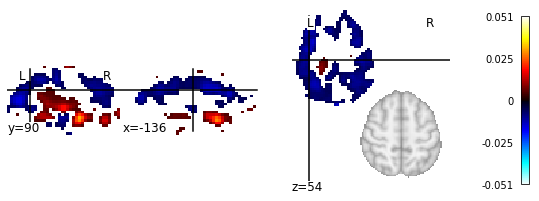

In [13]:
plot_stat_map(image.index_img(components_img, 4))

In [38]:
from nilearn.input_data import NiftiMasker

roi_masker = NiftiMasker(mask_img=first_component,
                        standardize=True,
                        memory="nilearn_cache",
                        smoothing_fwhm=8)

print(roi_masker.mask_img)

<class 'nibabel.nifti1.Nifti1Image'>
data shape (64, 64, 30)
affine: 
[[-3.28125  0.       0.       0.     ]
 [ 0.       3.28125  0.      -0.     ]
 [ 0.       0.       3.      -0.     ]
 [ 0.       0.       0.       1.     ]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [ 3 64 64 30  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [-1.       3.28125  3.28125  3.       1.       1.       1.       1.     ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.04080546
cal_min         : -0.012960312
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin     

In [53]:
import numpy as np
from scipy import ndimage

from nilearn import _utils
from nilearn.image import new_img_like
from nilearn._utils.cache_mixin import cache
from nilearn._utils.ndimage import largest_connected_component, get_border_data
from nilearn._utils.niimg import _safe_get_data, img_data_dtype

In [47]:
mask_img = _utils.check_niimg_3d(roi_masker.mask_img)

In [59]:
mask_img = _utils.check_niimg_3d(mask_img)
mask = mask_img.get_data()
mask = _utils.as_ndarray(mask, dtype=bool)

In [61]:
mask_img = new_img_like(mask_img, mask, mask_img.affine)

In [67]:
from nilearn.masking import _apply_mask_fmri

roi_masked = _apply_mask_fmri(complete_path, mask_img, dtype='f', smoothing_fwhm=None, ensure_finite=True)

In [68]:
roi_masked.shape

(300, 6662)